Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


C:\Users\bhuva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 169s 6s/step - accuracy: 0.6735 - loss: 1.4222 - val_accuracy: 0.9050 - val_loss: 0.1878
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 125s 5s/step - accuracy: 0.9498 - loss: 0.1461 - val_accuracy: 0.9600 - val_loss: 0.0923
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 125s 5s/step - accuracy: 0.9926 - loss: 0.0366 - val_accuracy: 0.9700 - val_loss: 0.0692
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 124s 5s/step - accuracy: 0.9926 - loss: 0.0352 - val_accuracy: 0.9800 - val_loss: 0.0609
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 125s 5s/step - accuracy: 0.9915 - loss: 0.0263 - val_accuracy: 0.9900 - val_loss: 0.0491
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 125s 5s/step - accuracy: 0.9962 - loss: 0.0189 - val_accuracy: 0.9800 - val_loss: 0.0585
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 0.9800 - val_loss: 0.0601
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 125s 5s/step - accuracy: 0.9988 - loss: 0.0064 - val_accuracy: 0.9900 - v

Model Saved Successfully!


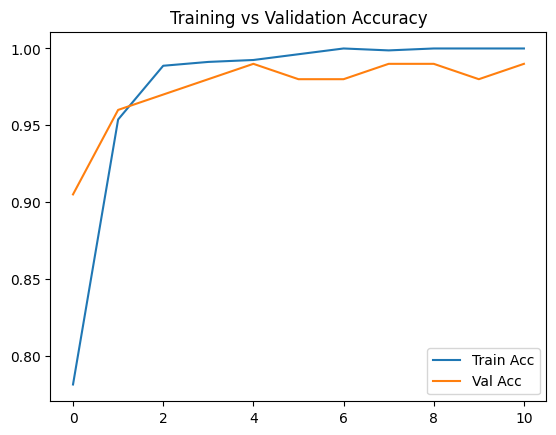

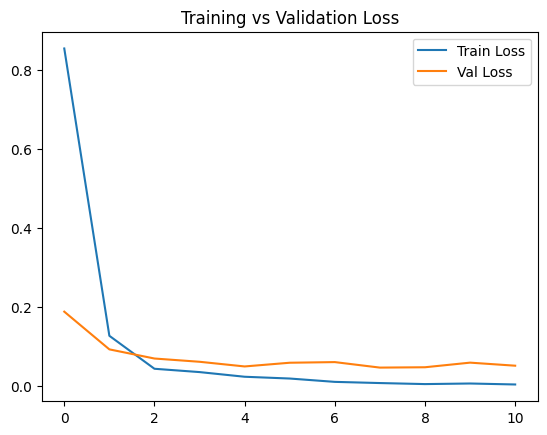

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# ==================== PATH ========================
dataset_path = r"C:\Users\bhuva\Downloads\All Projects\colon cancer detection\LC25000\Test Set"

# ==================== DATA GENERATOR ===============
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# ==================== VGG16 MODEL ====================
base = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))

for layer in base.layers:
    layer.trainable = False  # freeze pretrained layers

x = Flatten()(base.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base.input, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ==================== TRAINING ========================
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[es]
)

model.save("binary_cancer_detector_vgg16.h5")
print("Model Saved Successfully!")

# ==================== PLOTS ==========================
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


In [2]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model, Model

# PATHS
malignant_path = r"C:\Users\bhuva\Downloads\All Projects\colon cancer detection\LC25000\Test Set\colon_aca"

# Load trained binary model
model = load_model("binary_cancer_detector_vgg16.h5")

# Create feature extractor (2nd last layer)
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)

features = []
filenames = []

# Extract features for each malignant image
for fname in os.listdir(malignant_path):
    img_path = os.path.join(malignant_path, fname)
    
    img = load_img(img_path, target_size=(224,224))
    arr = img_to_array(img) / 255.0
    arr = np.expand_dims(arr, axis=0)
    
    feat = feature_extractor.predict(arr)
    features.append(feat[0])
    filenames.append(fname)

features = np.array(features)

np.save("malignant_features.npy", features)
np.save("malignant_filenames.npy", filenames)

print("Extracted features for", len(features), "malignant images!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

KMeans Clustering Complete!
Cluster counts: [ 83 110 122 185]
Silhouette Score: 0.17742953


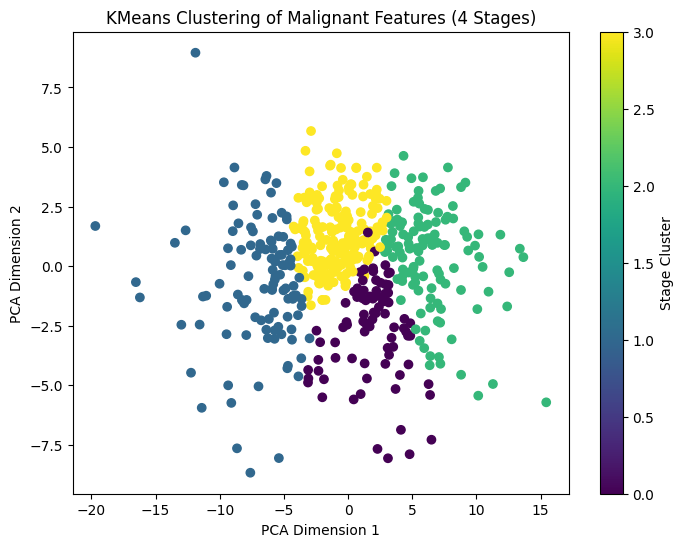

In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load extracted features
features = np.load("malignant_features.npy")

# ============= KMEANS CLUSTERING (4 STAGES) =================
kmeans = KMeans(n_clusters=4, random_state=42)
stage_labels = kmeans.fit_predict(features)

# Save labels
np.save("malignant_stage_labels.npy", stage_labels)

print("KMeans Clustering Complete!")
print("Cluster counts:", np.bincount(stage_labels))

# ============= SILHOUETTE SCORE =================
sil_score = silhouette_score(features, stage_labels)
print("Silhouette Score:", sil_score)

# ============= PCA VISUALIZATION =================
pca = PCA(n_components=2)
reduced = pca.fit_transform(features)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=stage_labels, cmap="viridis")
plt.title("KMeans Clustering of Malignant Features (4 Stages)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.colorbar(label="Stage Cluster")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\bhuva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5818 - loss: 1.1729 - val_accuracy: 0.8150 - val_loss: 0.5519
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7085 - loss: 0.6694 - val_accuracy: 0.8700 - val_loss: 0.4326
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7549 - loss: 0.5354 - val_accuracy: 0.8550 - val_loss: 0.3689
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8070 - loss: 0.4472 - val_accuracy: 0.8850 - val_loss: 0.2997
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8114 - loss: 0.4194 - val_accuracy: 0.8850 - val_loss: 0.2799
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8439 - loss: 0.3524 - val_accuracy: 0.9250 - val_loss: 0.2601
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8721 - loss: 0.3089 - val_accuracy: 0.9100 - val_loss: 0.2453
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8661 - loss: 0.3203 - val_accuracy: 0.9200 - val_loss: 0.2557
Ep

Final 5-class classifier saved!


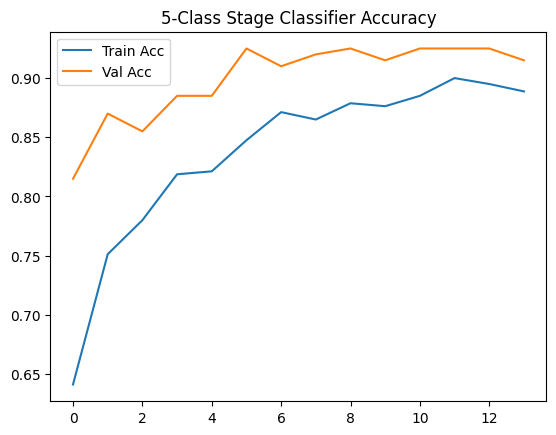

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load features + labels
features = np.load("malignant_features.npy")     # shape (500, 4096)
stage_labels = np.load("malignant_stage_labels.npy")  # 0,1,2,3

# Add NORMAL images as class 0
# Load binary normal images as features too
# (reuse same VGG feature extractor from Phase 2)

import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model, Model

normal_path = r"C:\Users\bhuva\Downloads\All Projects\colon cancer detection\LC25000\Test Set\colon_n"
binary_model = load_model("binary_cancer_detector_vgg16.h5")
feature_model = Model(inputs=binary_model.input, outputs=binary_model.layers[-2].output)

normal_features = []

for fname in os.listdir(normal_path):
    img_path = os.path.join(normal_path, fname)
    img = load_img(img_path, target_size=(224,224))
    arr = img_to_array(img)/255.0
    arr = np.expand_dims(arr, axis=0)
    feat = feature_model.predict(arr)
    normal_features.append(feat[0])

normal_features = np.array(normal_features)
normal_labels = np.zeros(len(normal_features))

# Combine both
X = np.concatenate([normal_features, features], axis=0)
y = np.concatenate([normal_labels, stage_labels + 1], axis=0) 
# +1 because: 1-4 are stages, 0 is normal

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# FINAL CLASSIFIER
classifier = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = classifier.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[es]
)

classifier.save("final_stage_classifier.h5")
print("Final 5-class classifier saved!")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("5-Class Stage Classifier Accuracy")
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


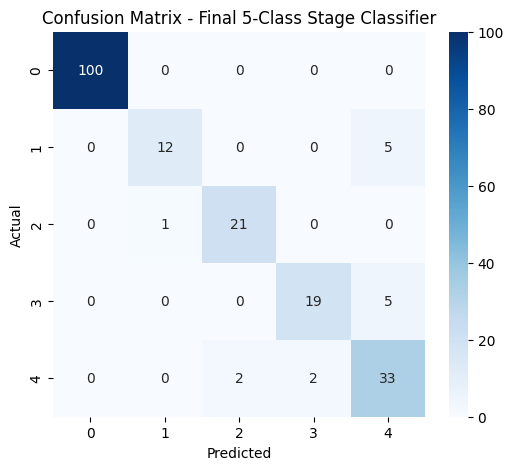

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on test set
y_pred = classifier.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Final 5-Class Stage Classifier")
plt.show()


In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       0.92      0.71      0.80        17
         2.0       0.91      0.95      0.93        22
         3.0       0.90      0.79      0.84        24
         4.0       0.77      0.89      0.82        37

    accuracy                           0.93       200
   macro avg       0.90      0.87      0.88       200
weighted avg       0.93      0.93      0.92       200



In [1]:
import os

normal_path = r"C:\Users\bhuva\Downloads\All Projects\colon cancer detection\LC25000\Test Set\colon_n"
cancer_path = r"C:\Users\bhuva\Downloads\All Projects\colon cancer detection\LC25000\Test Set\colon_aca"

print("Normal images:", len(os.listdir(normal_path)))
print("Malignant images:", len(os.listdir(cancer_path)))
print("Total:", len(os.listdir(normal_path)) + len(os.listdir(cancer_path)))


Normal images: 500
Malignant images: 500
Total: 1000
